In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1
url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
titanic = pd.read_csv(url)

In [2]:
#2
null_columns = titanic.columns[titanic.isnull().any()].tolist()
print("Features with Null values:", null_columns)

Features with Null values: ['Age', 'Cabin', 'Embarked']


In [3]:
#3
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-3-d570ba5e1e80>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
<ipython-input-3-d570ba5e1e80>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

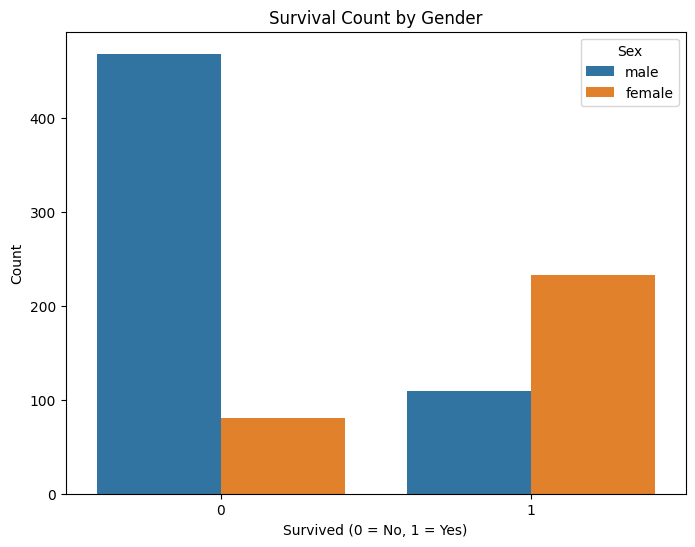

In [4]:
#4
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

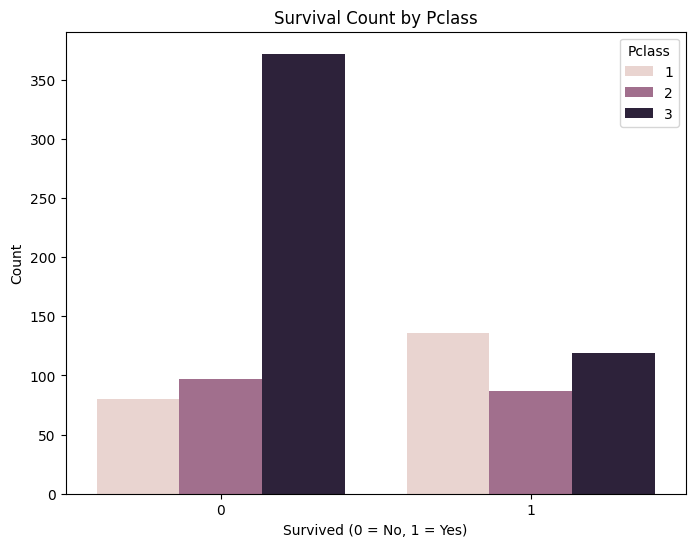

In [5]:
#5
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=titanic)
plt.title('Survival Count by Pclass')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [6]:
#6
def categorize_age(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

titanic['AgeClass'] = titanic['Age'].apply(categorize_age)

In [7]:
#7
titanic.drop('Age', axis=1, inplace=True)

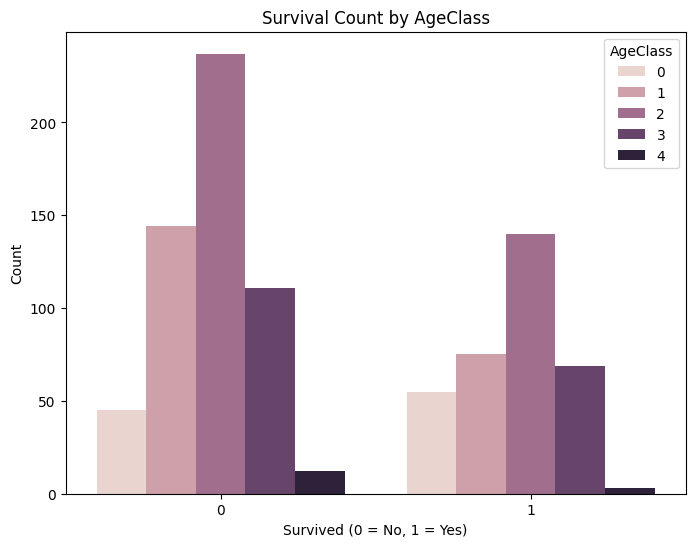

In [8]:
#8
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='AgeClass', data=titanic)
plt.title('Survival Count by AgeClass')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [11]:
print("\nUpdated DataFrame:")
print(titanic.head())


Updated DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare    Cabin Embarked  AgeClass  
0         A/5 21171   7.2500  Unknown        S         1  
1          PC 17599  71.2833      C85        C         3  
2  STON/O2. 3101282   7.9250  Unknown        S         1  
3            113803  53.1000     C123        S         2  